# KNN Heart Disease Classification

## Data Loading

In [1]:
import pandas as pd

dataset = pd.read_csv('./heart.csv')
display(dataset.head())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Exploratory Data Analysis

In [2]:
display(dataset.info())
display(dataset.isnull().sum())
display(dataset.describe())
display(dataset['target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


target
1    526
0    499
Name: count, dtype: int64

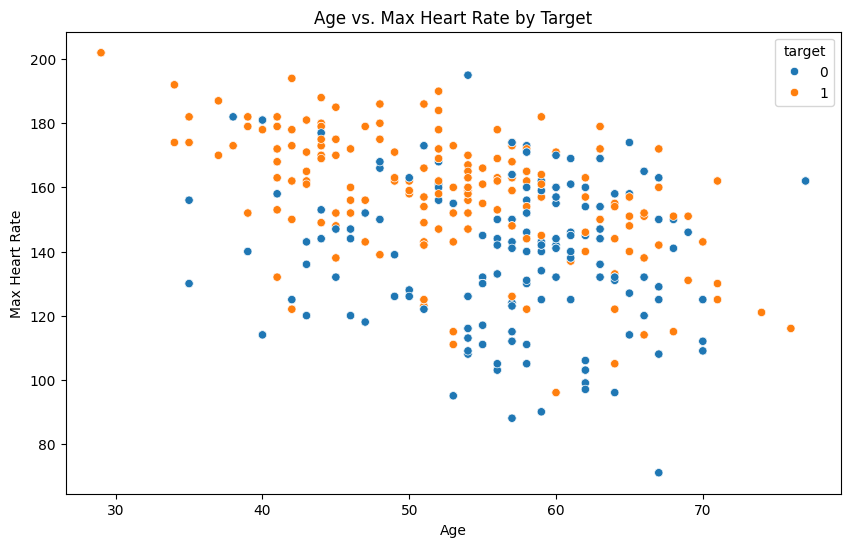

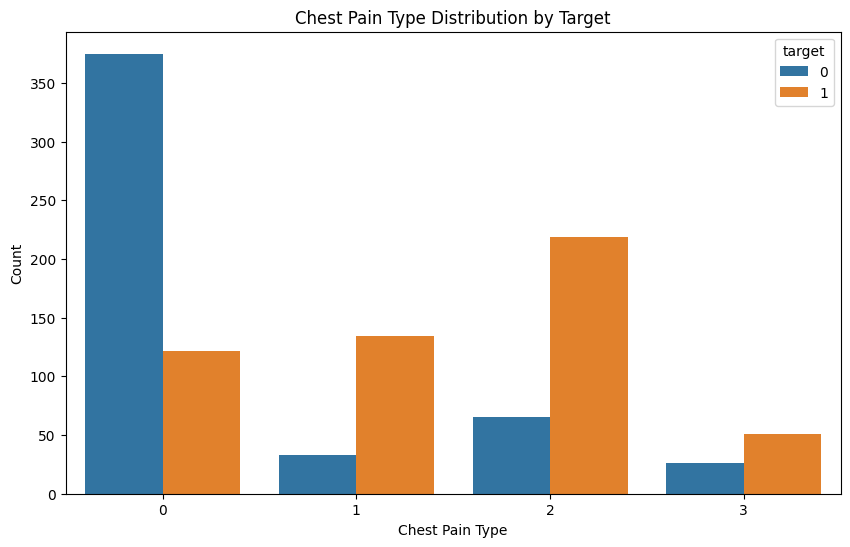

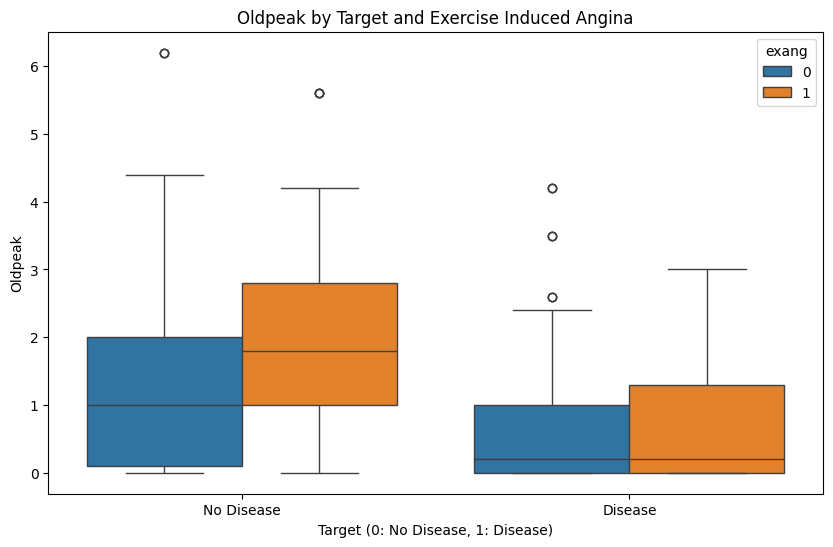

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=dataset)
plt.title('Age vs. Max Heart Rate by Target')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=dataset)
plt.title('Chest Pain Type Distribution by Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='oldpeak', hue='exang', data=dataset)
plt.title('Oldpeak by Target and Exercise Induced Angina')
plt.xlabel('Target (0: No Disease, 1: Disease)')
plt.ylabel('Oldpeak')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

## Data Splitting

In [5]:
from sklearn.model_selection import train_test_split

features = dataset.drop('target', axis=1)
labels = dataset['target']

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

print("Shape of train_features:", train_features.shape)
print("Shape of test_features:", test_features.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of train_features: (820, 13)
Shape of test_features: (205, 13)
Shape of train_labels: (820,)
Shape of test_labels: (205,)


## KNN Model Training

In [6]:
print(train_features.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(train_features, train_labels)        

KNeighborsClassifier()

In [8]:
print(train_features.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [9]:
from sklearn.neighbors import KNeighborsClassifier

# The dataset already has numeric columns, so we can use them directly
classifier = KNeighborsClassifier()
classifier.fit(train_features, train_labels)

KNeighborsClassifier()

## Hyperparameter Tuning

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_options = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

base_classifier = KNeighborsClassifier()

grid_optimizer = GridSearchCV(base_classifier, param_options, cv=5)

grid_optimizer.fit(train_features, train_labels)

print("Best hyperparameters:", grid_optimizer.best_params_)

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1}


## Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

optimal_classifier = grid_optimizer.best_estimator_
predictions = optimal_classifier.predict(test_features)

acc_score = accuracy_score(test_labels, predictions)
prec_score = precision_score(test_labels, predictions)
rec_score = recall_score(test_labels, predictions)

print("Accuracy:", acc_score)
print("Precision:", prec_score)
print("Recall:", rec_score)

Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767


## Decision Boundary Visualization

Creating mesh grid from 28.0 to 78.0 (x) and 70.0 to 203.0 (y)
Mesh grid shape: (133, 50), Total points to predict: 6650


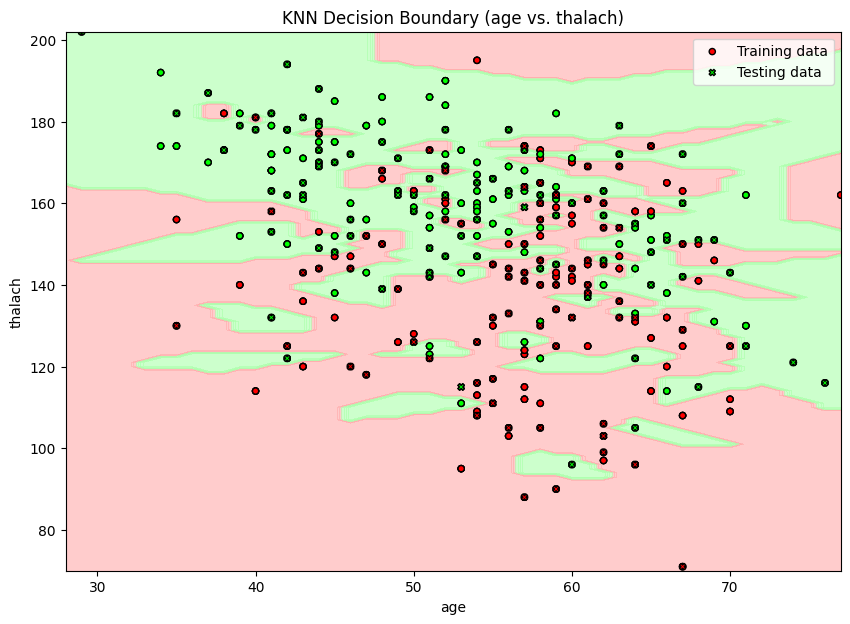

In [13]:
import numpy as np
from matplotlib.colors import ListedColormap

feature_1 = 'age'
feature_2 = 'thalach'  # Using the correct column name for max heart rate

if feature_1 not in train_features.columns or feature_2 not in train_features.columns:
    print(f"Selected features '{feature_1}' or '{feature_2}' not found in the DataFrame.")
else:
    train_subset = train_features[[feature_1, feature_2]]
    test_subset = test_features[[feature_1, feature_2]]

    boundary_classifier = KNeighborsClassifier(n_neighbors=optimal_classifier.n_neighbors, metric=optimal_classifier.metric)
    boundary_classifier.fit(train_subset, train_labels)

    # Use a larger step size to reduce computation
    step_size = 1.0  # Increased from 0.02 to 1.0
    x_min, x_max = train_subset[feature_1].min() - 1, train_subset[feature_1].max() + 1
    y_min, y_max = train_subset[feature_2].min() - 1, train_subset[feature_2].max() + 1
    
    print(f"Creating mesh grid from {x_min:.1f} to {x_max:.1f} (x) and {y_min:.1f} to {y_max:.1f} (y)")
    mesh_x, mesh_y = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    
    print(f"Mesh grid shape: {mesh_x.shape}, Total points to predict: {mesh_x.size}")
    
    # Create DataFrame for mesh predictions to maintain feature names
    mesh_points = pd.DataFrame(np.c_[mesh_x.ravel(), mesh_y.ravel()], columns=[feature_1, feature_2])
    boundary_predictions = boundary_classifier.predict(mesh_points)
    boundary_predictions = boundary_predictions.reshape(mesh_x.shape)

    color_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    color_bold = ListedColormap(['#FF0000', '#00FF00'])

    plt.figure(figsize=(10, 7))
    plt.contourf(mesh_x, mesh_y, boundary_predictions, cmap=color_light, alpha=0.6)

    plt.scatter(train_subset[feature_1], train_subset[feature_2], c=train_labels, cmap=color_bold, edgecolor='k', s=20, label='Training data')
    plt.scatter(test_subset[feature_1], test_subset[feature_2], c=test_labels, cmap=color_bold, edgecolor='k', s=20, marker='X', label='Testing data')

    plt.title(f"KNN Decision Boundary ({feature_1} vs. {feature_2})")
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.legend()
    plt.show()